In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import folium

In [2]:
df=pd.read_csv('volcano_data_2010.csv')
df.head()

,Year,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,...,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
0,2010,1,NaN,NaN,NaN,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2010,3,31.0,NaN,NaN,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,5,27.0,NaN,NaN,Pacaya,Guatemala,Guatemala,14.381,-90.601,...,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0
3,2010,5,29.0,TSU,EQ,Sarigan,Mariana Is-C Pacific,United States,16.708,145.780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8,6.0,NaN,NaN,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,...,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0


In [3]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

<AxesSubplot:>

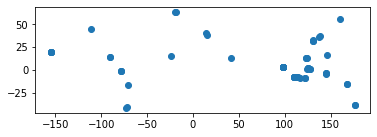

In [4]:
gdf.plot()

In [5]:
%matplotlib inline

In [13]:
map = folium.Map(location = None, tiles = "Stamen Terrain")

In [17]:
df1=df

df2 = df1.loc[:, ("Year", "Name", "Country",
                 "Latitude", "Longitude", "Type")]

#check the first and last 5 rows
df2.head(n = 5)
df2.tail(n = 5)


df_ll = df2.loc[:, ("Latitude", "Longitude")]
df_ll['Latitude'] = df_ll['Latitude'].apply(lambda x: round(x,2))
df_ll['Longitude'] = df_ll['Longitude'].apply(lambda x: round(x,2))
df_ll_list = df_ll.values.tolist()

In [27]:
#insert multiple markers, iterate through list
#each marker popup will display info from the list
#add a different color marker associated with type of volcano

#subset desired properties to display in popup
df_year = df2.loc[:, ("Year")]
df_name = df2.loc[:, ("Name")]
df_country = df2.loc[:, ("Country")]
df_type = df2.loc[:, ("Type")]


i = 0
for coordinates in df_ll_list:

#assign a color marker for the type of volcano, Strato being the most common
    if df_type[i] == "Stratovolcano":
        type_color = "green"
    elif df_type[i] == "Complex volcano":
        type_color = "blue"
    elif df_type[i] == "Shield volcano":
        type_color = "orange"
    else:
        type_color = "black"


#now place the markers with the popup labels and data
    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            "Year: " + str(df_year[i]) + '<br>' +
                            "Name: " + str(df_name[i]) + '<br>' +
                            "Country: " + str(df_country[i]) + '<br>'
                            "Type: " + str(df_type[i]) + '<br>'
                            "Coordinates: " + str(df_ll_list[i]),
                            icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1

In [26]:
map